In [1]:
# first install imaginglss with pip from a terminal window!
# in imaginglss source code directory, run
# pip install --user -e . 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import imaginglss

In [3]:
decals = imaginglss.DECALS('/project/projectdirs/m779/imaginglss/dr2.conf.py')

In [4]:
dr = decals.datarelease

Matching 
http://legacysurvey.org/viewer/?ra=244.6758&dec=7.3071&zoom=13&layer=decals-dr2

In [5]:
from imaginglss.analysis import completeness
from imaginglss.analysis import targetselection


In [6]:
from imaginglss.utils.npyquery import Column as C

In [7]:
b = dr.brickindex.get_brick(dr.brickindex.search_by_name('2445p072'))

In [8]:
tractor = dr.catalogue.open(b)
sigma = {'r':5, 'z':5, 'g':5}
LRG = targetselection.LRG(tractor)
QSO = targetselection.QSO(tractor)
ELG = completeness.ELG(sigma)(targetselection.ELG(tractor))
BGS = completeness.BGS(sigma)(targetselection.BGS(tractor))

/global/project/projectdirs/m779/yfeng1/source/imaginglss/imaginglss/utils/npyquery.py:436: RuntimeWarning: invalid value encountered in power
  r = node.function(*ops)
/global/project/projectdirs/m779/yfeng1/source/imaginglss/imaginglss/utils/npyquery.py:436: RuntimeWarning: invalid value encountered in greater
  r = node.function(*ops)
/global/project/projectdirs/m779/yfeng1/source/imaginglss/imaginglss/utils/npyquery.py:436: RuntimeWarning: divide by zero encountered in power
  r = node.function(*ops)


In [9]:
depth = dr.read_depths((tractor['RA'], tractor['DEC']), 'rgz')

## MW_TRANSMISION in Tractor Catalogue and from Tractor Images

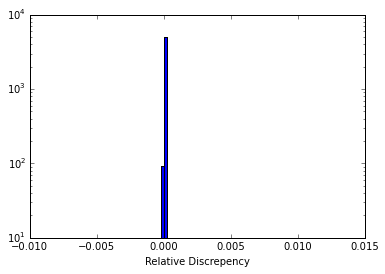

In [13]:
_ = hist(tractor['DECAM_MW_TRANSMISSION'][:, 4] /  depth['DECAM_MW_TRANSMISSION'][:, 4] - 1, range=(-.01, .01), bins=100, log=True)
xlabel('Relative Discrepency')

## DECAM_DEPTH in Tractor Catalogue and from Tractor Images

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


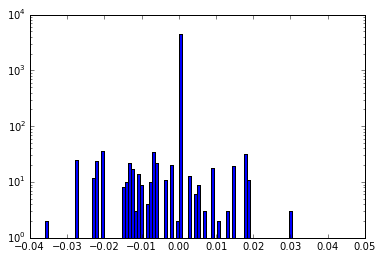

In [16]:
_ = hist(tractor['DECAM_DEPTH'][:, 4] /  depth['DECAM_DEPTH'][:, 4] - 1, 
         range=(-0.04, 0.04), bins=100, log=True)
xlabel('Relative Discrepency')
#loglog()
#bad = abs(tractor['DECAM_DEPTH'][:, 4] /  depth['DECAM_FLUX_IVAR'][:, 4] - 1) > 0.01
#print bad.sum(), len(tractor)

## Slightly Mislocated Tycho stars

And what's going on with the objects?

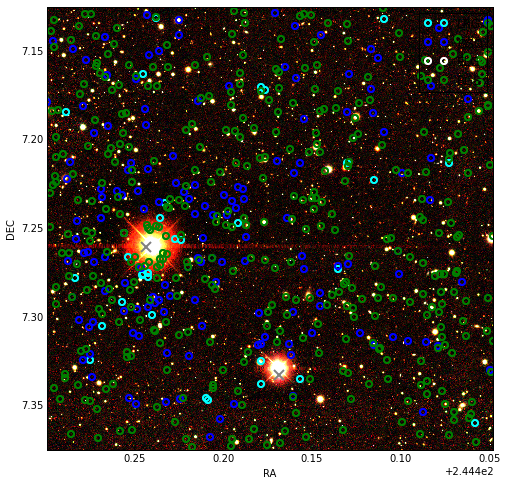

In [17]:
figure(figsize=(8, 8))
rimg = dr.images['image']['r']
gimg = dr.images['image']['g']
zimg = dr.images['image']['z']

composite = array([
        zimg.open(b).clip(0, 0.05),
        rimg.open(b).clip(0, 0.05), 
        gimg.open(b).clip(0, 0.05), 
        ]).transpose((1,2,0))
composite /= composite.max()
#plot(tractor['RA'][bad], tractor['DEC'][bad], '+', mfc='none', mew=2, mec='yellow', label='bad')
plot(LRG['RA'], LRG['DEC'], 'o', mfc='none', mew=2, mec='cyan', label='LRG')
plot(QSO['RA'], QSO['DEC'], 'o', mfc='none', mew=2, mec='blue', label='QSO')
plot(ELG['RA'], ELG['DEC'], 'o', mfc='none', mew=2, mec='white', label='ELG')
plot(BGS['RA'], BGS['DEC'], 'o', mfc='none', mew=2, mec='green', label='BGS')
plot(decals.tycho['RA'], decals.tycho['DEC'], 'x', markersize=10, mew=2, mfc='none', mec='gray')
imshow(composite,       
       extent=(b.ra2, b.ra1, b.dec2, b.dec1))   
xlabel('RA')
ylabel('DEC')
legend()

In [18]:
%%bash
git stash
git pull
git add BrickInvestigation.ipynb
git commit -m "update BrickInvestigation.ipynb"
git push

Saved working directory and index state WIP on master: 0094c2c update the COSMOS example (remove .data)
HEAD is now at 0094c2c update the COSMOS example (remove .data)
Already up-to-date.
# On branch master
# Untracked files:
#   (use "git add <file>..." to include in what will be committed)
#
#	.ipynb_checkpoints/
#	CompletenessRevisit.ipynb
#	imaginglss
nothing added to commit but untracked files present (use "git add" to track)


Everything up-to-date
